In [3]:
#Create first network with Keras
# import keras
# import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler

In [4]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
#dataset = numpy.loadtxt('pima-indians-diabetes.csv', delimiter=",")
dataset = pd.read_csv('pima-indians-diabetes.csv',header=None,)

#data=pd.DataFrame(dataset) #data is panda but dataset is something else
dataset.head()



,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# split into input (X ie dependent variables) and output (Y ie independent variables) variables
X = dataset.iloc[:,0:8]   #0-8 columns are dependent variables - remember 8th column is not included
Y = dataset.iloc[:,8]#8 column is independent variable
#Y= Y.reshape(-1,1)

In [6]:
type(X)

pandas.core.frame.DataFrame

In [7]:
X.shape

(768, 8)

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# create model
model = Sequential()
# model.add(Dense(1000, input_dim=8, activation='relu')) # 1000 neurons
# model.add(Dense(100, activation='tanh')) # 100 neurons with tanh activation function
model.add(Dense(500, input_dim=8, activation='relu')) # 500 neurons
# 93.36% accuracy with 500 neurons
# 86.99% accuracy with 100 neurons
# 85.2% accuracy with 50 neurons
# 81.38% accuracy with 10 neurons
model.add(Dense(1, activation='sigmoid')) # 1 output neuron



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-11 22:41:57.181198: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-02-11 22:41:57.181224: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-02-11 22:41:57.181227: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-02-11 22:41:57.181243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-11 22:41:57.181252: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow 

In [10]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2) # 150 epoch, 10 batch size, verbose = 2

Epoch 1/150


2025-02-11 22:41:57.484731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-02-11 22:41:57.486022: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


77/77 - 2s - 23ms/step - accuracy: 0.7435 - loss: 0.5334
Epoch 2/150
77/77 - 0s - 5ms/step - accuracy: 0.7708 - loss: 0.4621
Epoch 3/150
77/77 - 0s - 5ms/step - accuracy: 0.7865 - loss: 0.4541
Epoch 4/150
77/77 - 0s - 4ms/step - accuracy: 0.7786 - loss: 0.4482
Epoch 5/150
77/77 - 0s - 4ms/step - accuracy: 0.7852 - loss: 0.4427
Epoch 6/150
77/77 - 0s - 4ms/step - accuracy: 0.7878 - loss: 0.4385
Epoch 7/150
77/77 - 0s - 4ms/step - accuracy: 0.7891 - loss: 0.4373
Epoch 8/150
77/77 - 0s - 4ms/step - accuracy: 0.7865 - loss: 0.4309
Epoch 9/150
77/77 - 0s - 5ms/step - accuracy: 0.7969 - loss: 0.4301
Epoch 10/150
77/77 - 0s - 4ms/step - accuracy: 0.7917 - loss: 0.4313
Epoch 11/150
77/77 - 0s - 4ms/step - accuracy: 0.7956 - loss: 0.4246
Epoch 12/150
77/77 - 0s - 4ms/step - accuracy: 0.8047 - loss: 0.4215
Epoch 13/150
77/77 - 0s - 4ms/step - accuracy: 0.8021 - loss: 0.4228
Epoch 14/150
77/77 - 0s - 4ms/step - accuracy: 0.8021 - loss: 0.4175
Epoch 15/150
77/77 - 0s - 4ms/step - accuracy: 0.8008 

In [11]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9201 - loss: 0.2053
compile_metrics: 93.49%


In [12]:
# calculate predictions
predictions = model.predict(X)    # predicting Y only using X
print(predictions)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[9.74454939e-01]
 [2.26034001e-02]
 [9.90236938e-01]
 [8.39617511e-04]
 [9.74829316e-01]
 [6.18575923e-02]
 [1.78465530e-01]
 [5.13052344e-01]
 [9.99979138e-01]
 [8.82212341e-01]
 [3.62447575e-02]
 [9.20282245e-01]
 [7.95799345e-02]
 [9.99921203e-01]
 [7.75055289e-01]
 [8.11610818e-01]
 [8.88554811e-01]
 [7.26092637e-01]
 [1.04976416e-01]
 [7.03989565e-01]
 [2.39593625e-01]
 [1.17251789e-02]
 [9.97442126e-01]
 [9.12610769e-01]
 [7.31466949e-01]
 [5.64759195e-01]
 [8.38016570e-01]
 [9.67875880e-04]
 [1.89256296e-01]
 [7.18668997e-02]
 [2.56399184e-01]
 [9.17452335e-01]
 [1.21940987e-03]
 [3.23318364e-03]
 [3.31341863e-01]
 [1.07648578e-02]
 [5.82643688e-01]
 [7.28712797e-01]
 [1.65050551e-01]
 [8.18336248e-01]
 [6.73055589e-01]
 [5.48623741e-01]
 [2.46204492e-02]
 [9.90982831e-01]
 [6.67220831e-01]
 [9.96103406e-01]
 [7.41845489e-01]
 [6.30356045e-03]
 [5.60282052e-01]
 [1.34814098e-01]
 [6.23625412e-04]
 [5.70111489e-03]
 [1.47566227e-02]
 [9.94

In [13]:
# Round predictions
#rounded = [int(numpy.round(x, 0)) for x in predictions]
rounded = [round(x[0]) for x in predictions]
print(rounded)

print("Rounded type: ", type(rounded)) # rounded is a 'list' class
print("Shape of rounded: ", len(rounded))
print("Dataset type: ", type(dataset)) # numpy array?
print("Shape of dataset: ", dataset.shape)

[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

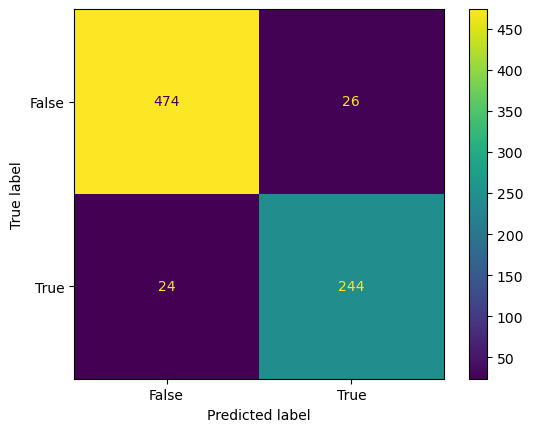

In [14]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = Y
predicted = rounded

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [15]:
# summarize the first 5 cases
for i in range(5):
	print(str(rounded[i]) + '=>(expected '+ str(Y[i]) +')')

1=>(expected 1)
0=>(expected 0)
1=>(expected 1)
0=>(expected 0)
1=>(expected 1)
